In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("C:/Users/pgupt/Desktop/project 2/Instagram.csv", encoding = 'latin1')
datanew = data
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
data.isnull().sum()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None
        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597 

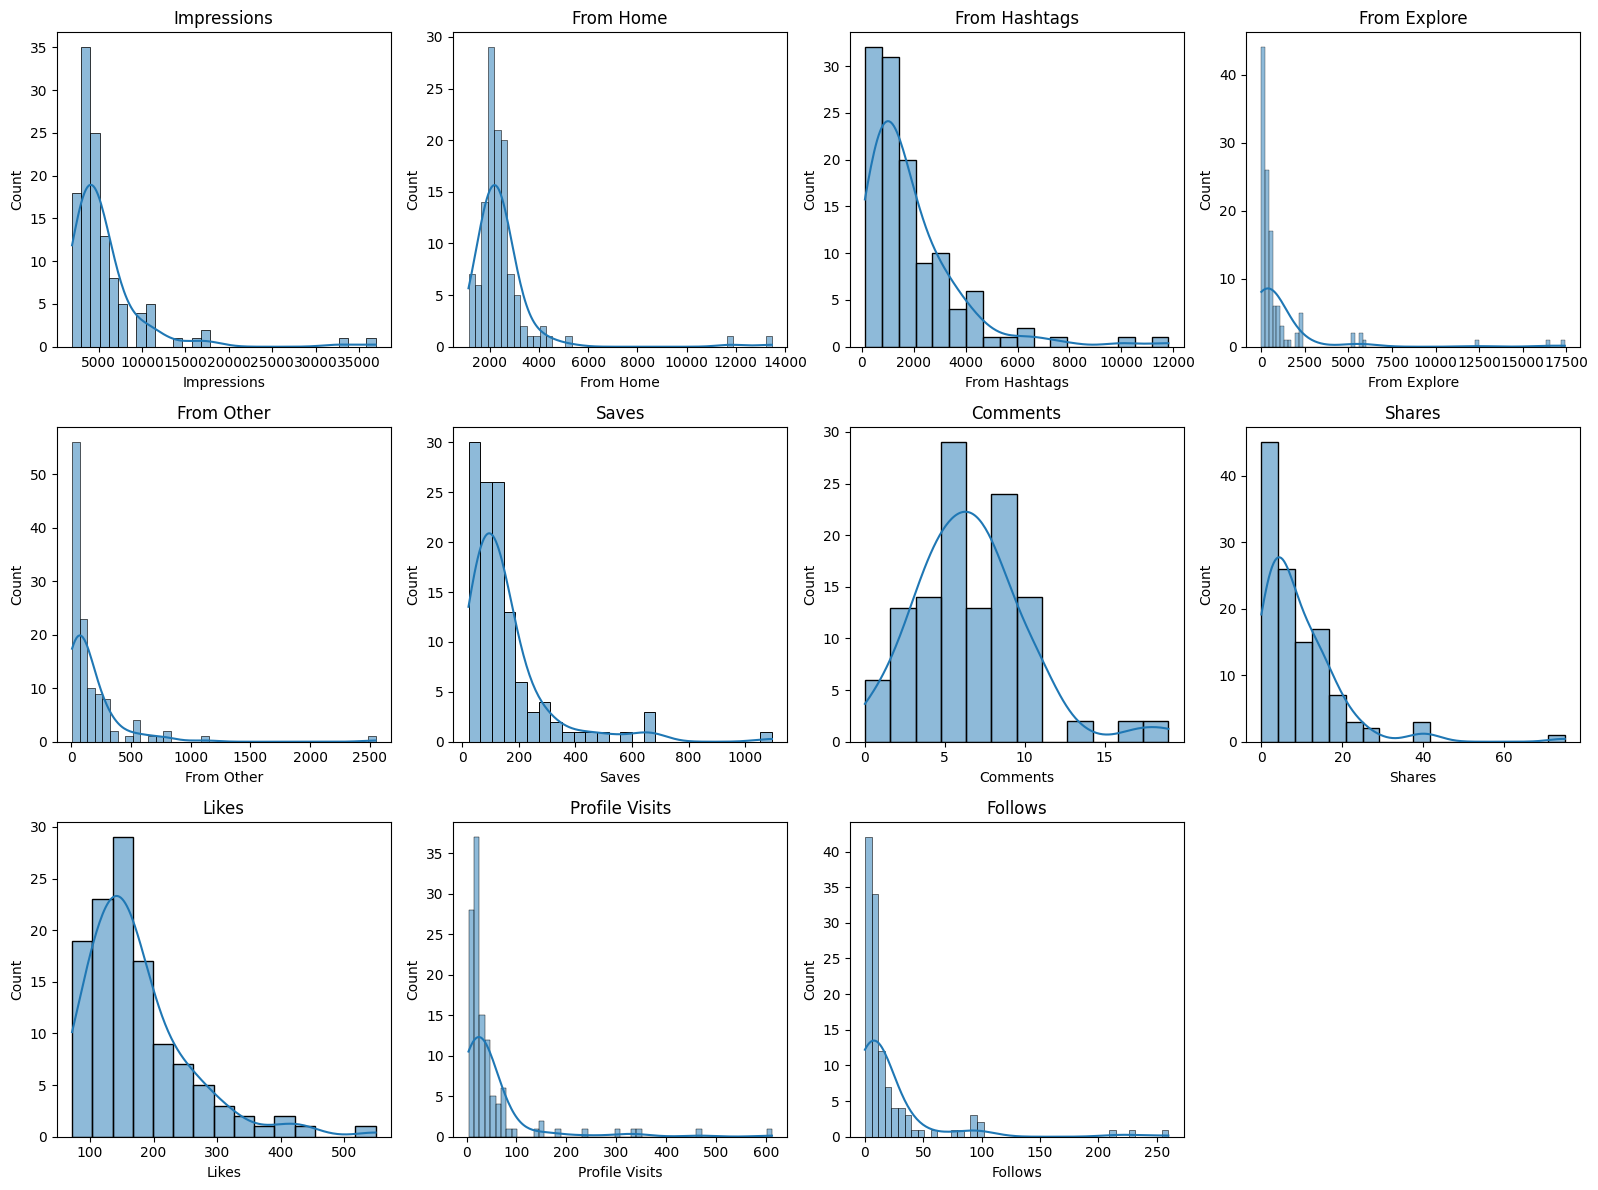

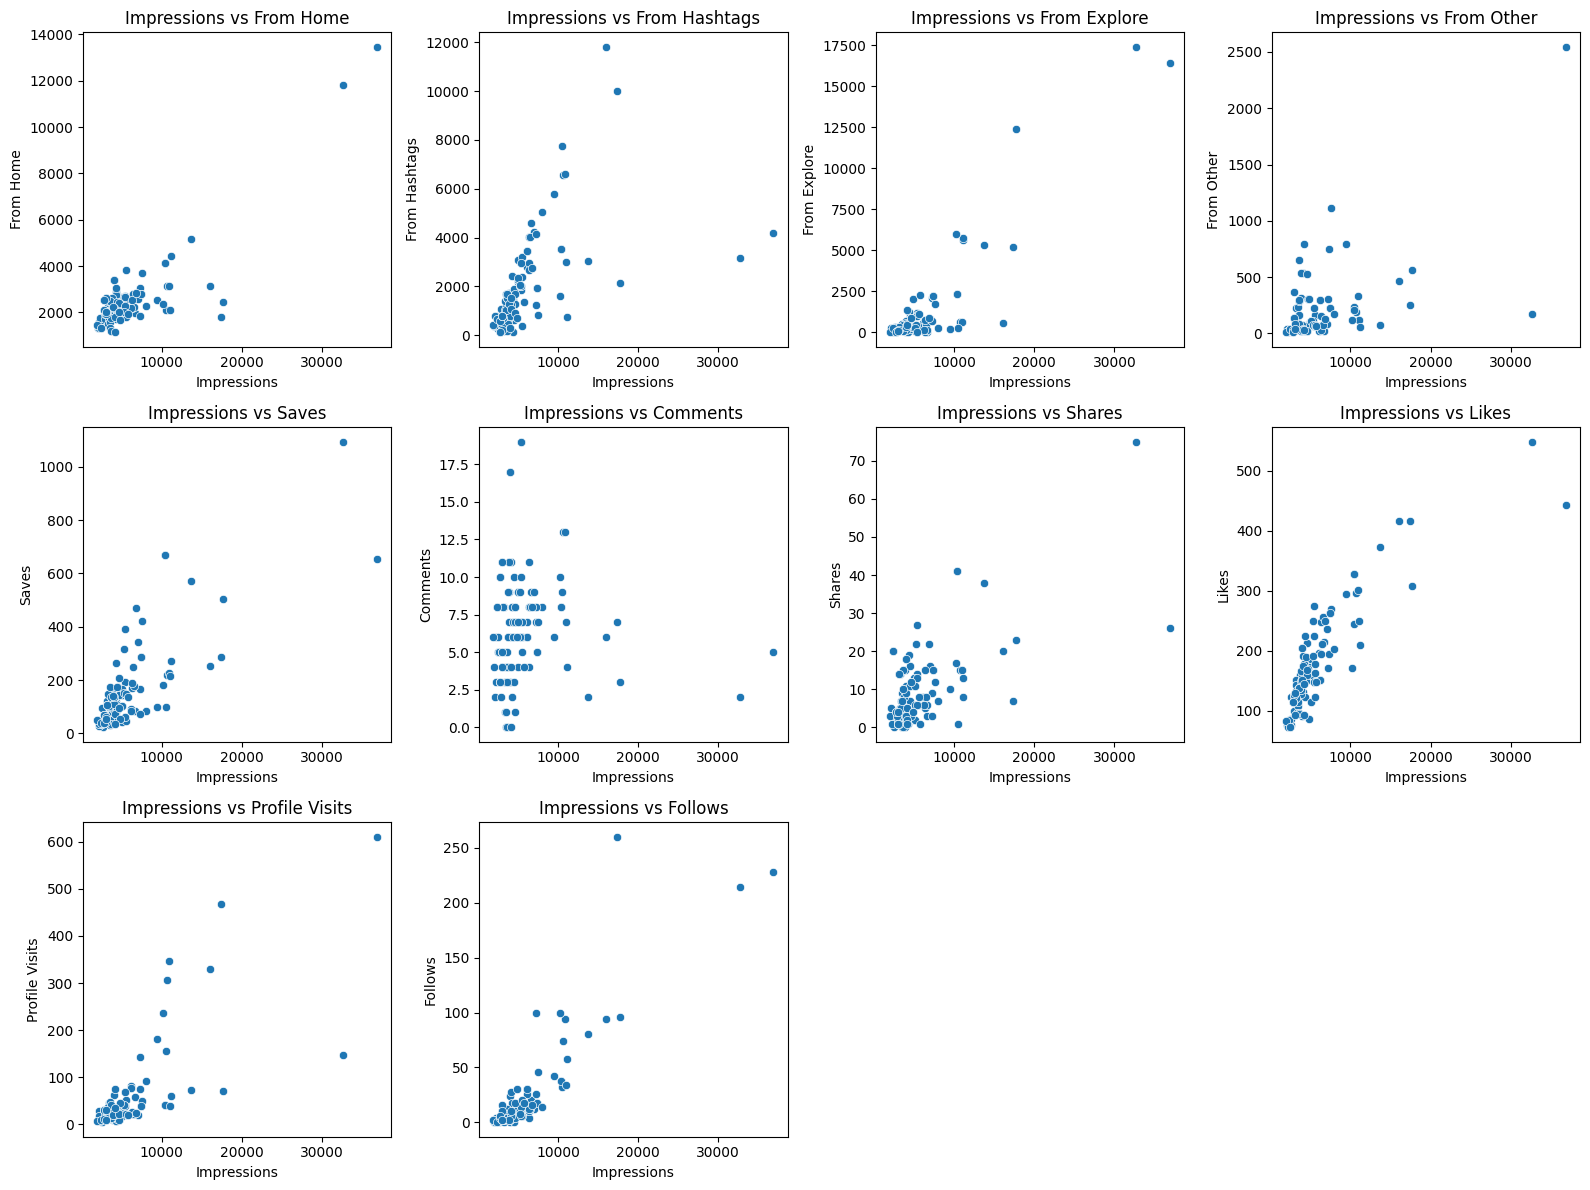

C:\Users\pgupt\AppData\Local\Temp\ipykernel_9184\2293167575.py:43: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



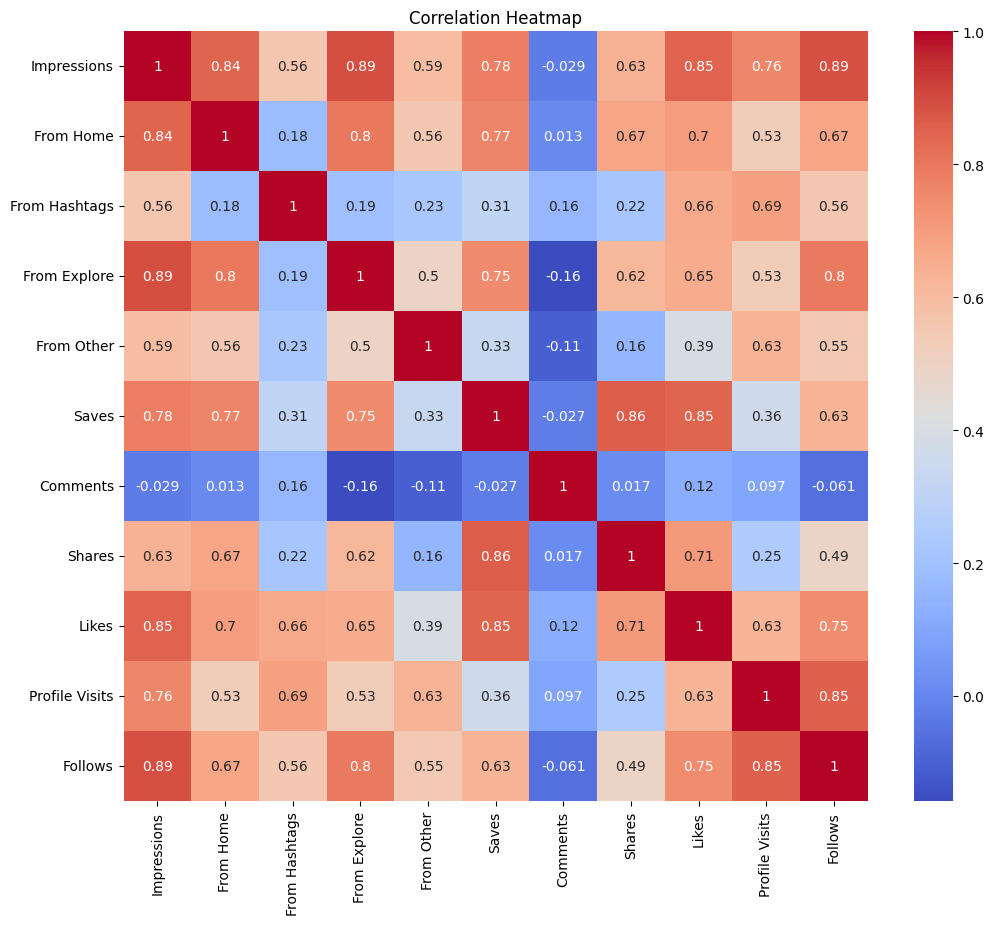

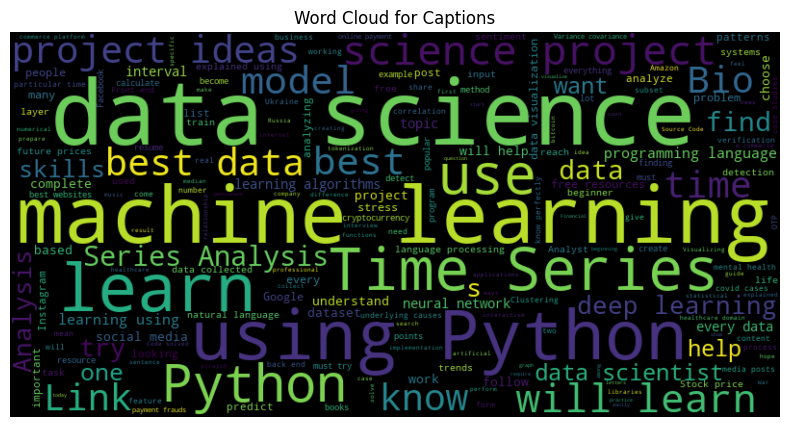

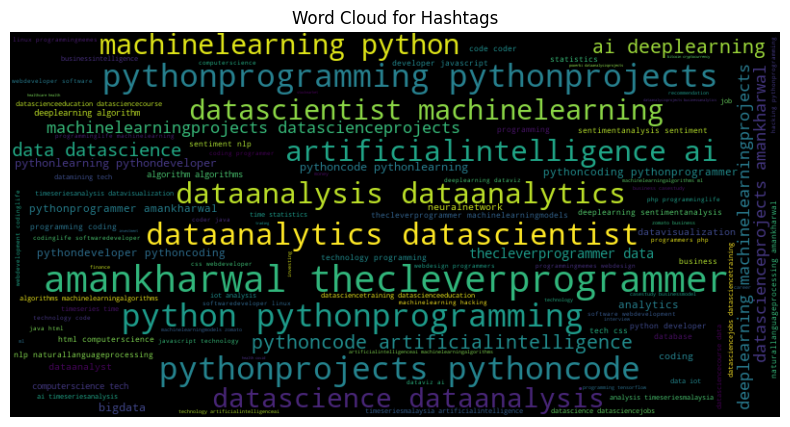

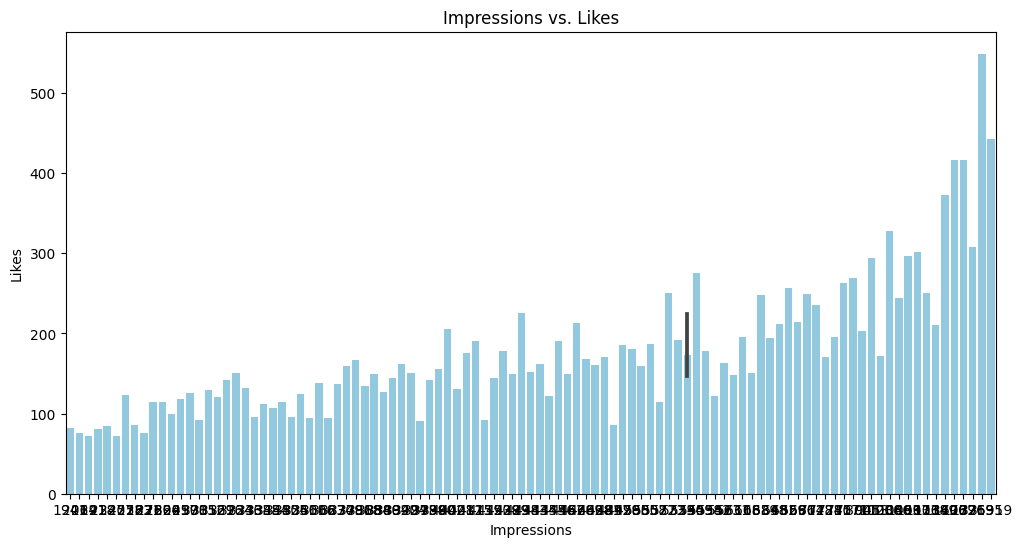

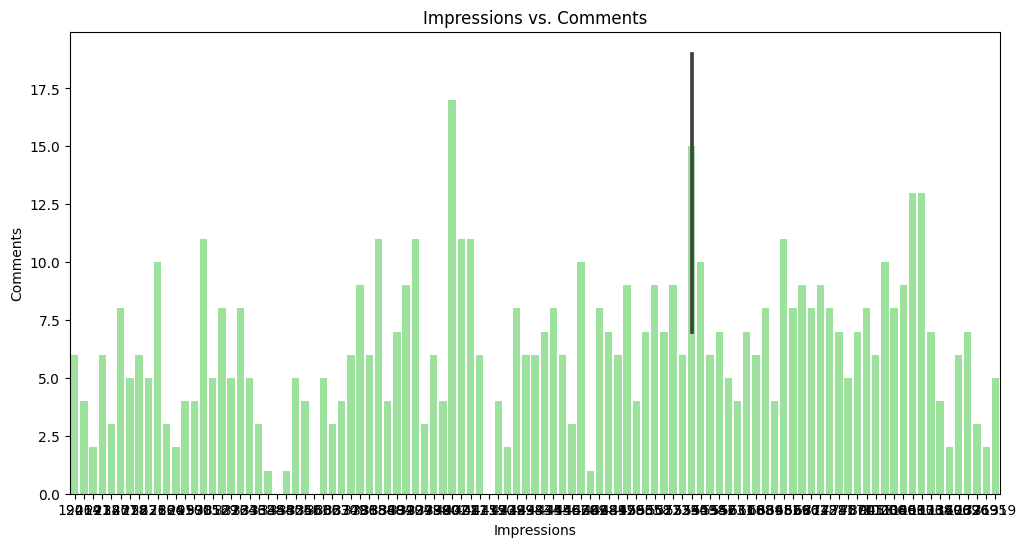

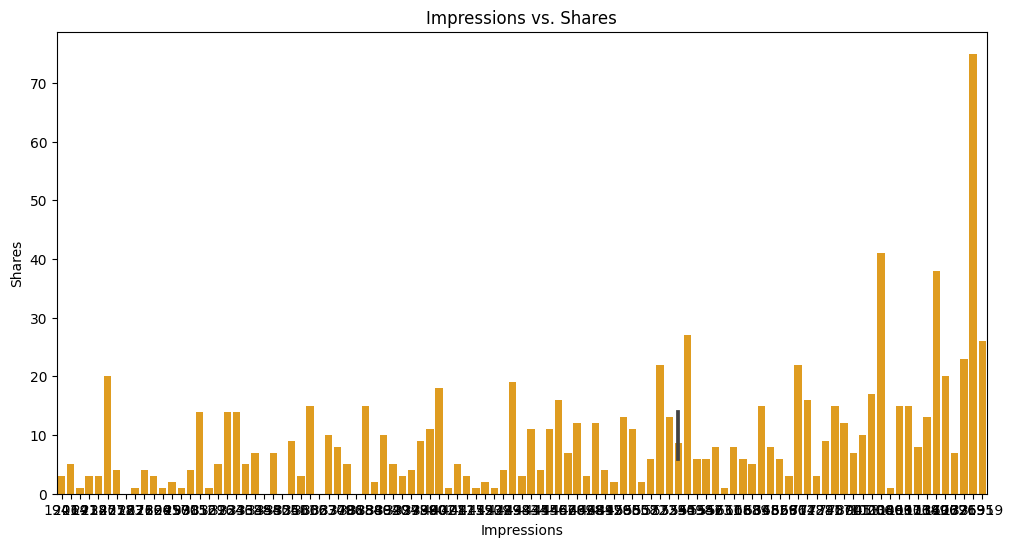

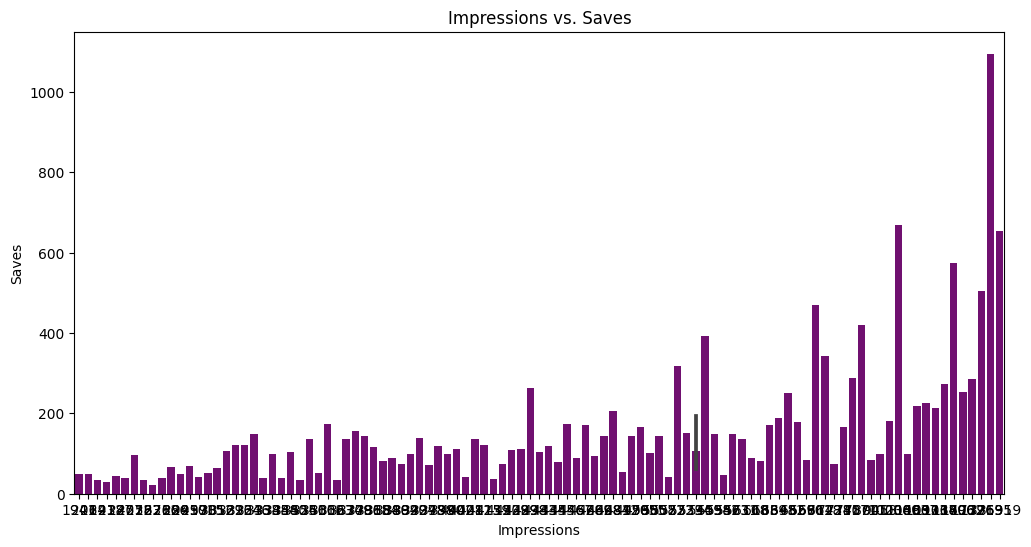

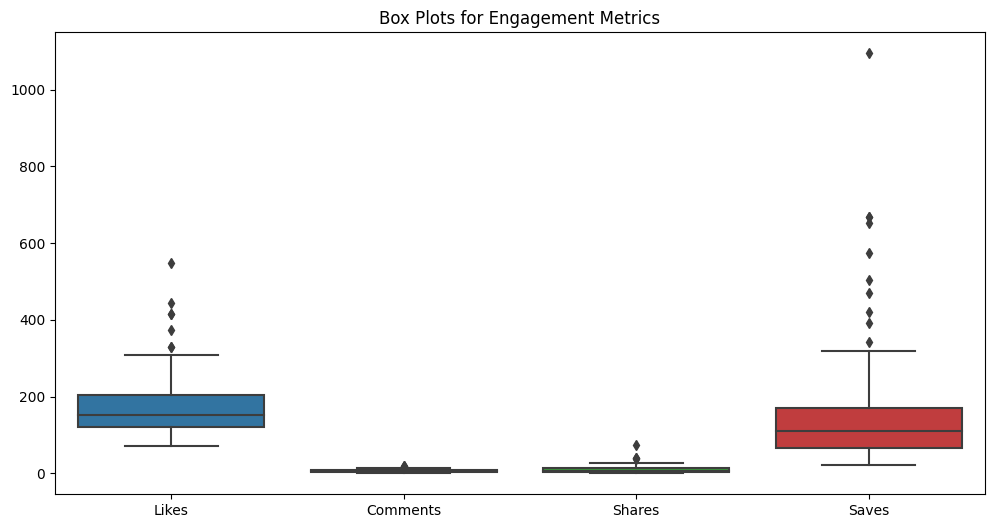

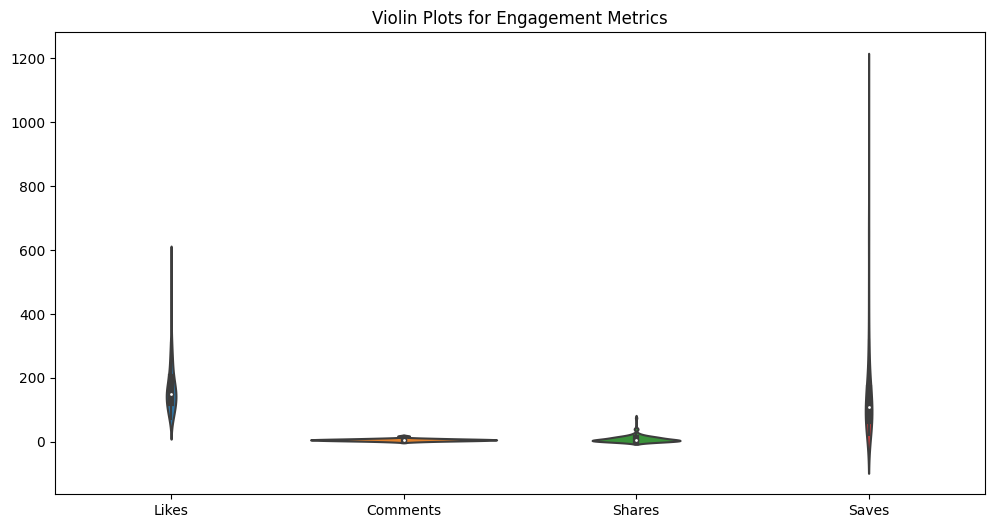

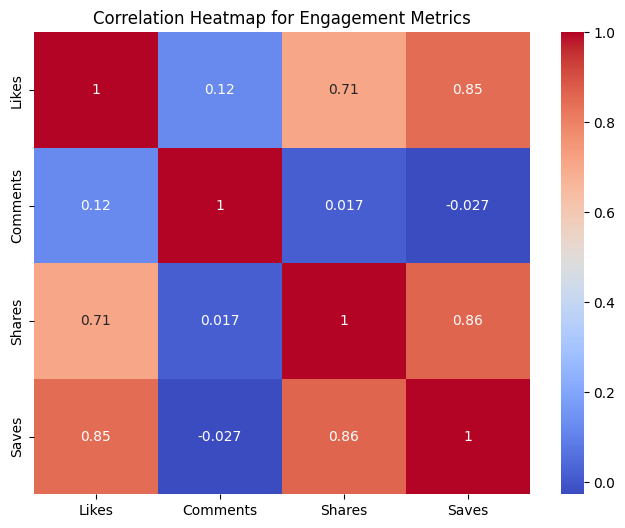

<Figure size 1200x1000 with 0 Axes>

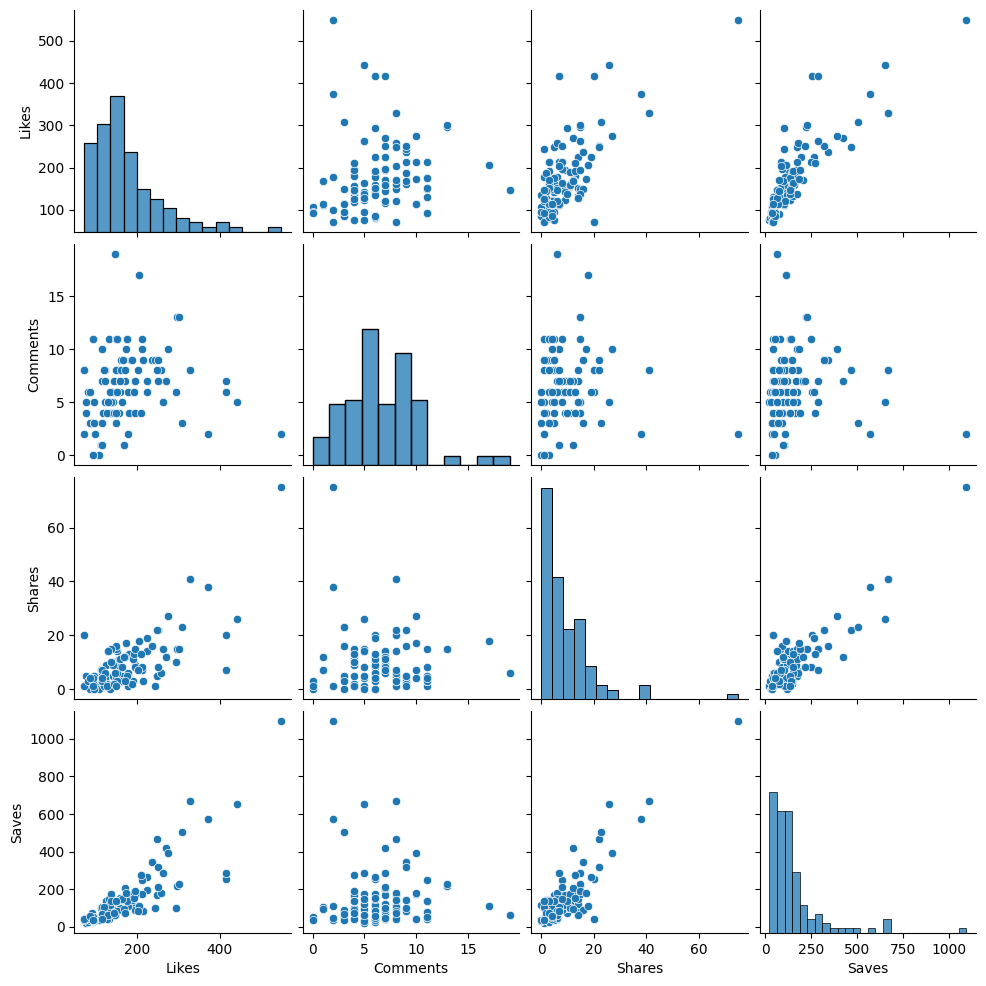

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Load the data
data = pd.read_csv("C:/Users/pgupt/Desktop/project 2/Instagram.csv", encoding='latin1')

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Visualize the distribution of numerical variables
plt.figure(figsize=(16, 12))
cols = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Explore the relationship between numerical variables using scatter plots
plt.figure(figsize=(16, 12))
cols = ['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(data=data, x='Impressions', y=col)
    plt.title(f'Impressions vs {col}')
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize the distribution of impressions from different sources
fig = px.pie(data, values=[data['From Home'].sum(), data['From Hashtags'].sum(), data['From Explore'].sum(), data['From Other'].sum()],
             names=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
             title='Distribution of Impressions by Source')
fig.show()

# Create word clouds for captions and hashtags
text = ' '.join(data['Caption'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Captions')
plt.show()

text = ' '.join(data['Hashtags'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Hashtags')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for engagement metrics (Likes, Comments, Shares, Saves)
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Impressions', y='Likes', color='skyblue')
plt.title('Impressions vs. Likes')
plt.xlabel('Impressions')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Impressions', y='Comments', color='lightgreen')
plt.title('Impressions vs. Comments')
plt.xlabel('Impressions')
plt.ylabel('Comments')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Impressions', y='Shares', color='orange')
plt.title('Impressions vs. Shares')
plt.xlabel('Impressions')
plt.ylabel('Shares')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Impressions', y='Saves', color='purple')
plt.title('Impressions vs. Saves')
plt.xlabel('Impressions')
plt.ylabel('Saves')
plt.show()

# Box plots for engagement metrics
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Likes', 'Comments', 'Shares', 'Saves']])
plt.title('Box Plots for Engagement Metrics')
plt.xticks([0, 1, 2, 3], ['Likes', 'Comments', 'Shares', 'Saves'])
plt.show()

# Violin plots for engagement metrics
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[['Likes', 'Comments', 'Shares', 'Saves']])
plt.title('Violin Plots for Engagement Metrics')
plt.xticks([0, 1, 2, 3], ['Likes', 'Comments', 'Shares', 'Saves'])
plt.show()

# Heatmap for correlations between engagement metrics
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Likes', 'Comments', 'Shares', 'Saves']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Engagement Metrics')
plt.show()

# Scatter plot matrix for engagement metrics
plt.figure(figsize=(12, 10))
sns.pairplot(data[['Likes', 'Comments', 'Shares', 'Saves']])
plt.show()

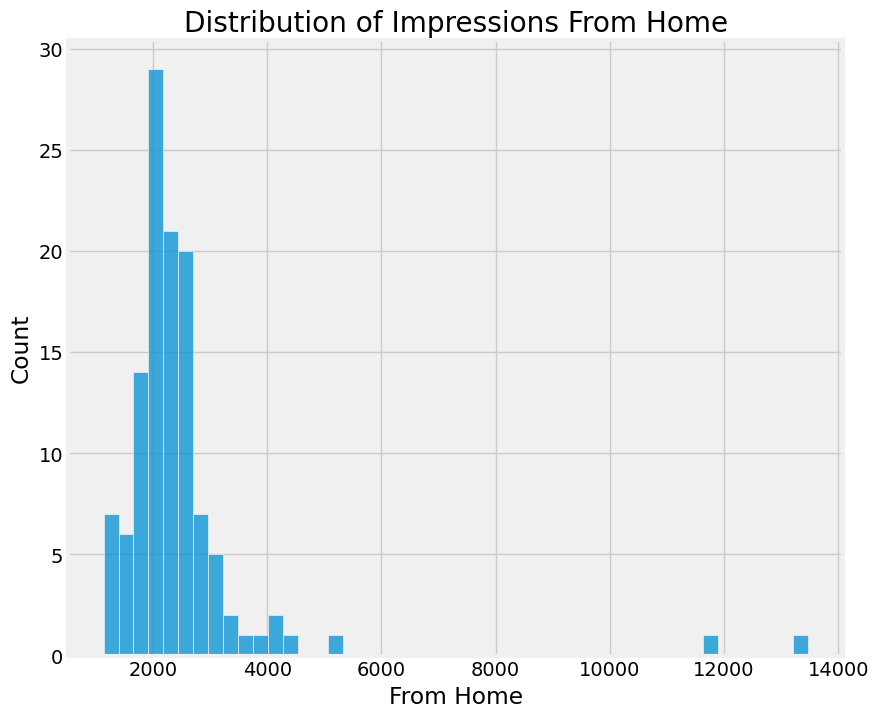

In [5]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

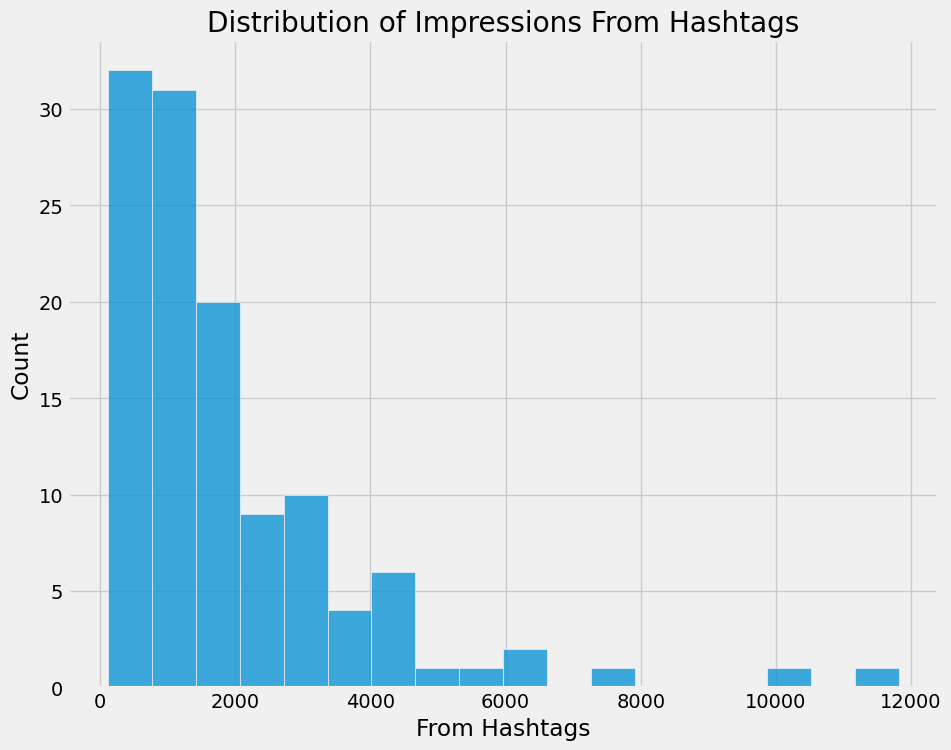

In [6]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

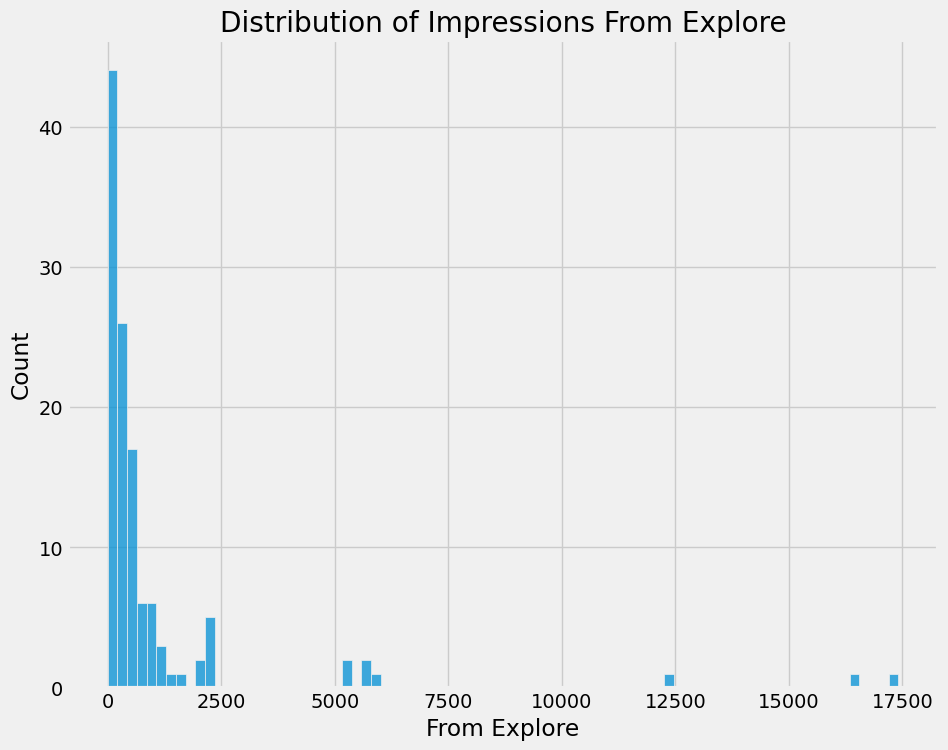

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'])
plt.show()

In [8]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

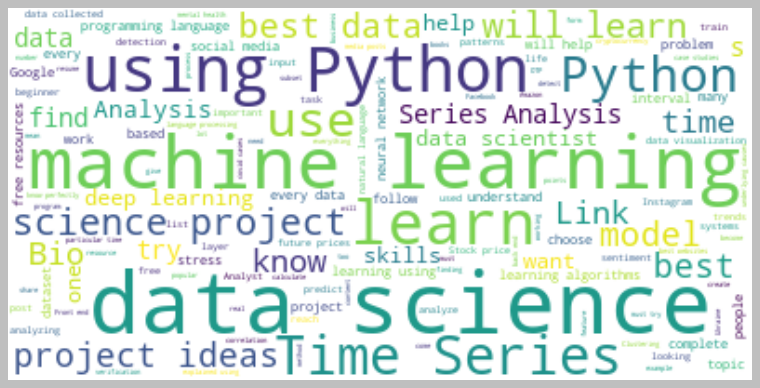

In [9]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

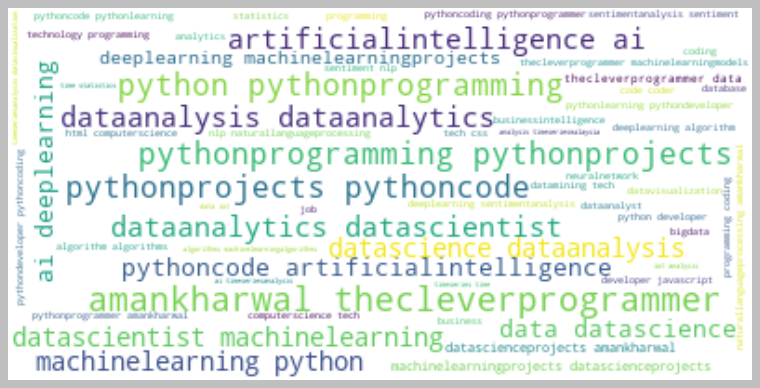

In [10]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [12]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [13]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [15]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3935629544.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [16]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [17]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

# Prediction Model 

### Passive Aggressive Regressor

In [18]:
x = np.array(data[['Likes', 'Saves', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [19]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8226541156964551

In [20]:
# Features = [['Likes','Saves', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10964.27143024])

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

# Load your data into the 'data' DataFrame

x = data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']].values
y = data['Impressions'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(PassiveAggressiveRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

best_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_model, xtrain, ytrain, cv=5)
mean_cv_score = np.mean(cv_scores)

# Model evaluation
ypred = best_model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2_score = best_model.score(xtest, ytest)

print("Best Model:", best_model)
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Cross-Validation Score:", mean_cv_score)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2_score)

Best Model: PassiveAggressiveRegressor(C=0.1, max_iter=100, random_state=42)
Mean Squared Error: 6875968.719663668
R-squared Score: 0.8229565558025583


In [22]:
# Features = [['Likes','Saves', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
best_model.predict(features)

array([10218.01801962])

### Random-Forest Analysis

In [23]:
# Perform Random Forest
# Encode text data
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score

text_cols = ['Caption', 'Hashtags']
vectorizer = CountVectorizer()
text_data = datanew[text_cols].apply(lambda x: ' '.join(x), axis=1)
text_features = vectorizer.fit_transform(text_data)

# Encode numerical data
numerical_cols = ['Likes', 'Saves', 'Shares', 'Profile Visits', 'Follows']
numerical_data = datanew[numerical_cols]

# Combine text and numerical features
X = sparse.hstack([text_features, numerical_data])
y = datanew['Impressions']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get input values for numerical features
input_data = {}
for feature in numerical_cols:
    input_data[feature] = float(input(f"{feature}: "))

# Get input values for text features
caption = input("Caption: ")
hashtags = input("Hashtags (separated by spaces): ").split()
text_input = ' '.join([caption] + hashtags)
text_input_features = vectorizer.transform([text_input])

# Combine text and numerical input features
input_features = sparse.hstack([text_input_features, pd.DataFrame(input_data, index=[0])])

# Make prediction
prediction = model.predict(input_features)
print(f"Predicted Impressions: {int(prediction[0])}")

### K-Means Analysis

c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

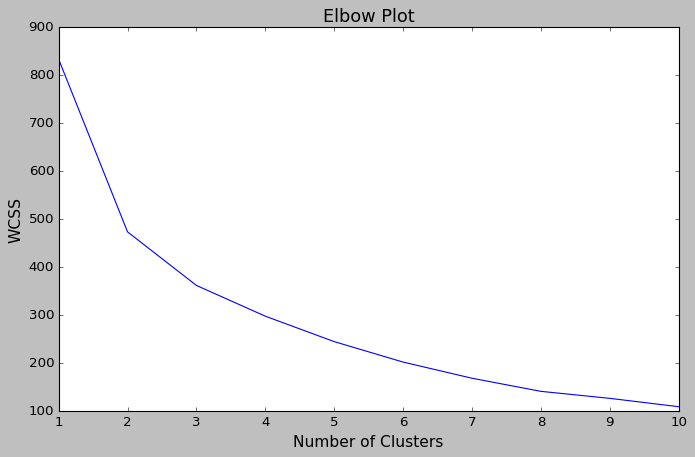

c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




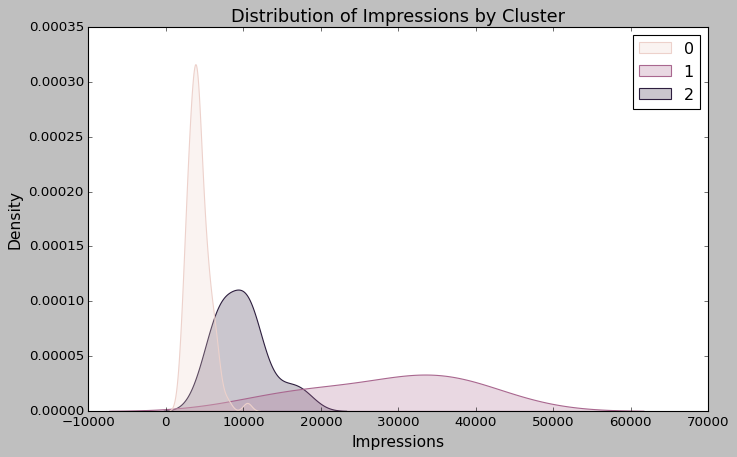

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




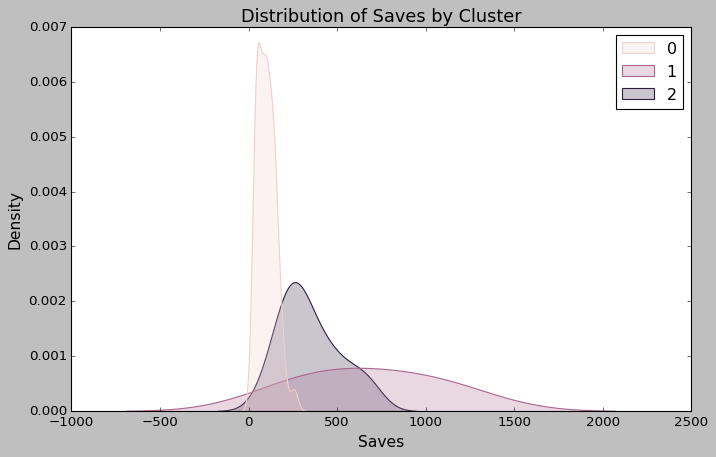

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




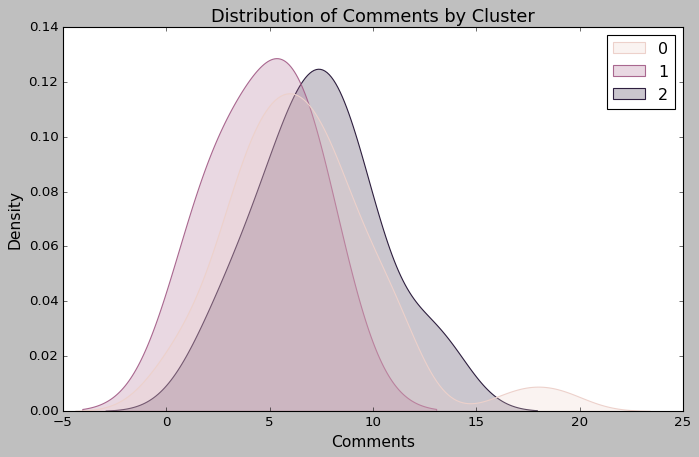

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




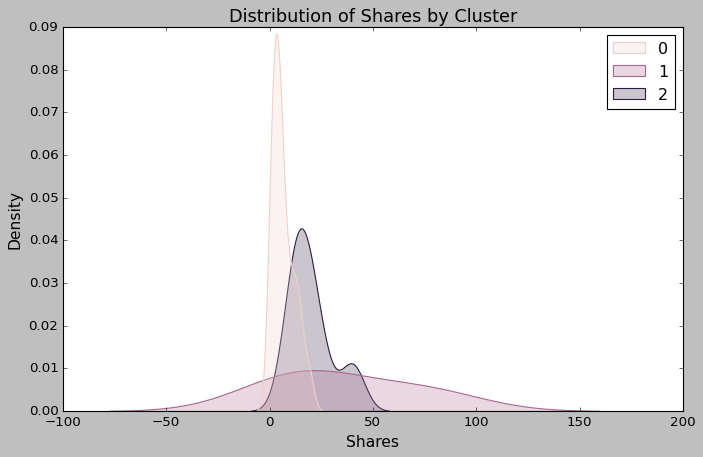

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




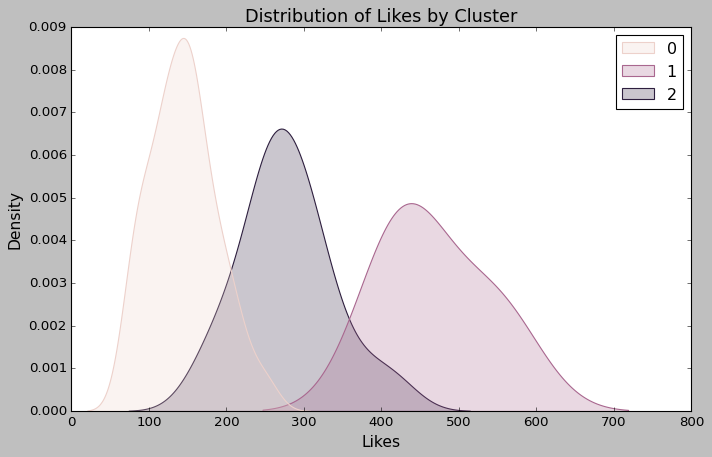

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




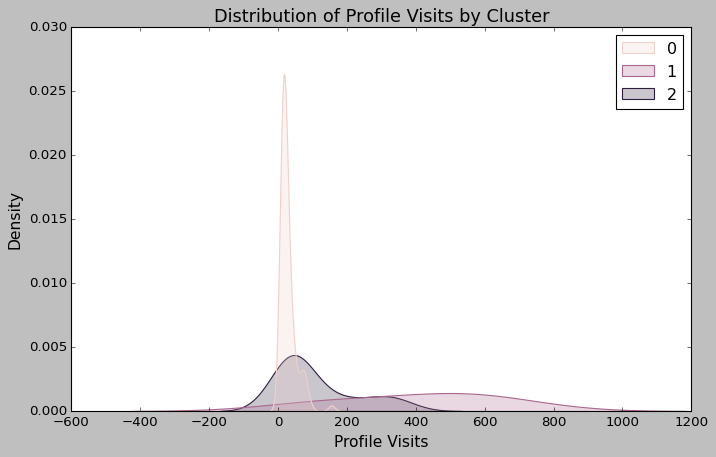

C:\Users\pgupt\AppData\Local\Temp\ipykernel_6532\3663022689.py:44: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




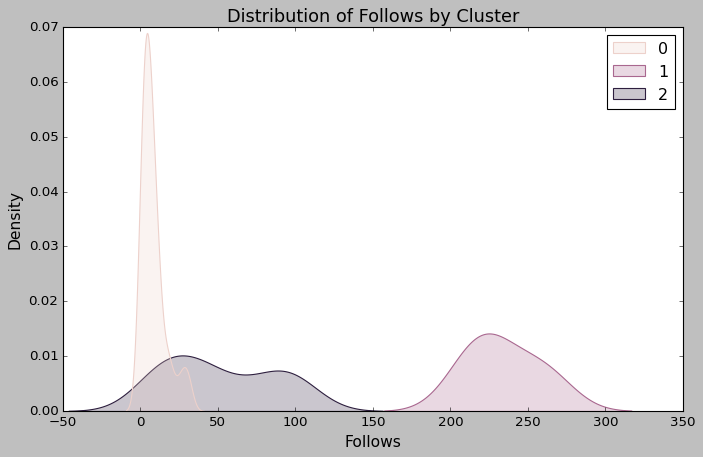

The new data point belongs to: Low Performing Posts


c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Select relevant features
features = ["Impressions", "Saves", "Comments", "Shares", "Likes", "Profile Visits", "Follows"]
X = data[features]

# Handle missing values or outliers if needed

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Plot to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.show()

# Determine the number of clusters (k) based on the elbow plot
k = 3  # Example: 3 clusters

# Fit the K-Means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Cluster Feature Comparison
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x=feature, hue=labels, shade=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Cluster', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()

# Analyze cluster centers and assign descriptive cluster labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = []
for i in range(k):
    center = cluster_centers[i]
    # Analyze the characteristics of the cluster and assign a descriptive label
    if X.ndim > 1:
        X_numpy = X.values  # Convert DataFrame to NumPy array
        mean_values = np.mean(center)
        percentile_25 = np.percentile(X_numpy, 25)
        percentile_75 = np.percentile(X_numpy, 75)
    else:
        mean_values = center
        percentile_25 = np.percentile(X.values, 25)
        percentile_75 = np.percentile(X.values, 75)

    if mean_values < percentile_25:
        cluster_labels.append('Low Performing Posts')
    elif mean_values < percentile_75:
        cluster_labels.append('Average Performing Posts')
    else:
        cluster_labels.append('High Performing Posts')

# Function to classify new data with descriptive labels
def classify_new_data(impressions, saves, comments, shares, likes, profile_visits, follows):
    new_data = np.array([[impressions, saves, comments, shares, likes, profile_visits, follows]])
    new_data_scaled = scaler.transform(new_data)
    cluster_label = kmeans.predict(new_data_scaled)[0]
    cluster_name = cluster_labels[cluster_label]
    return cluster_name

# Example usage
new_impressions = 1000
new_saves = 10
new_comments = 20
new_shares = 5
new_likes = 100
new_profile_visits = 30
new_follows = 5
cluster_result = classify_new_data(new_impressions, new_saves, new_comments, new_shares,
                                   new_likes, new_profile_visits, new_follows)
print(f"The new data point belongs to: {cluster_result}")

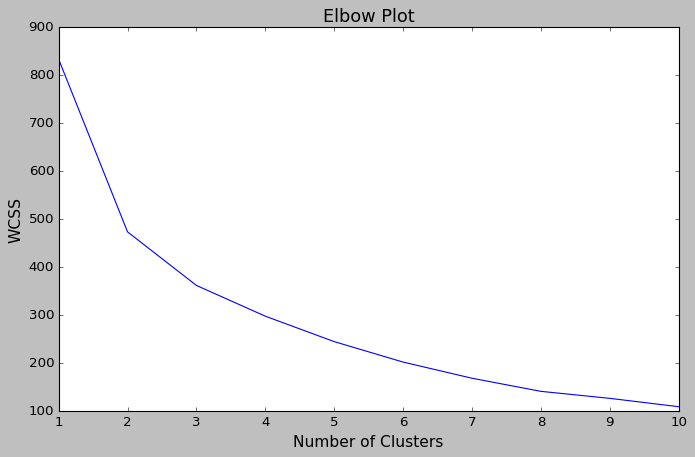

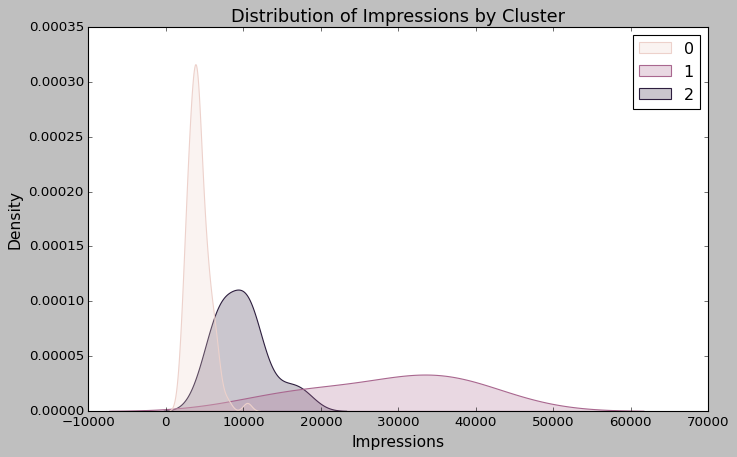

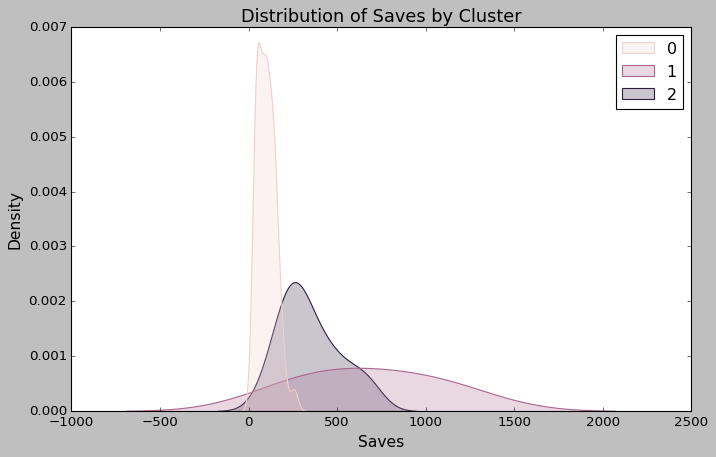

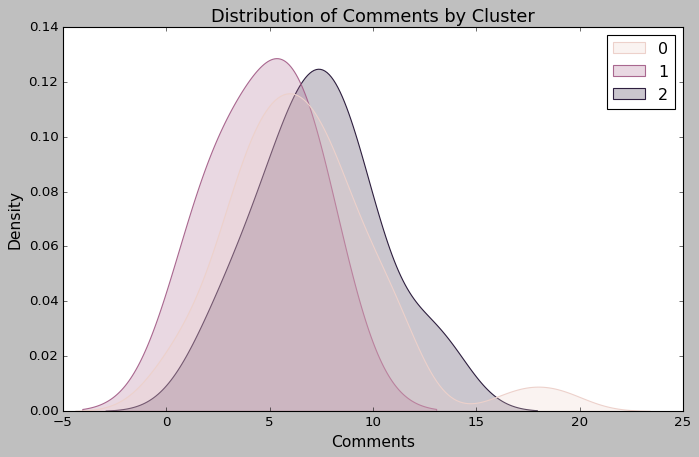

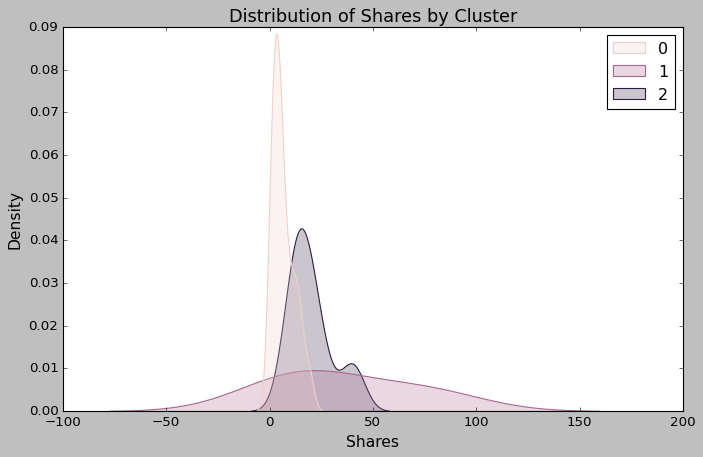

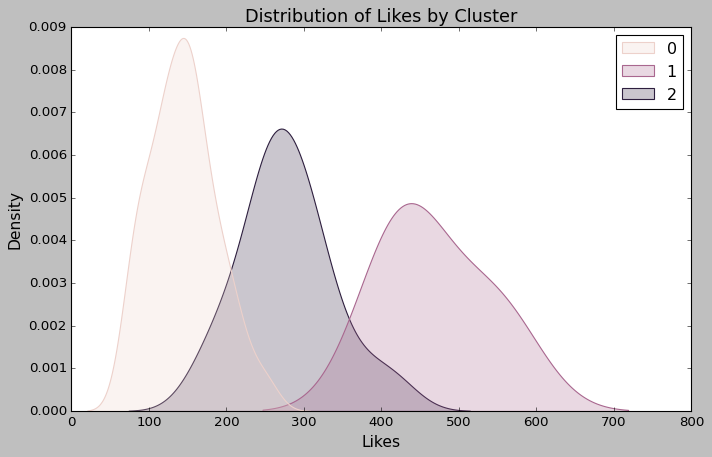

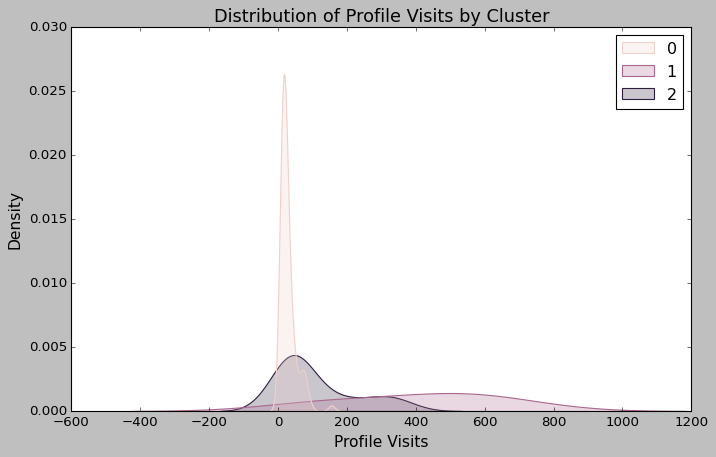

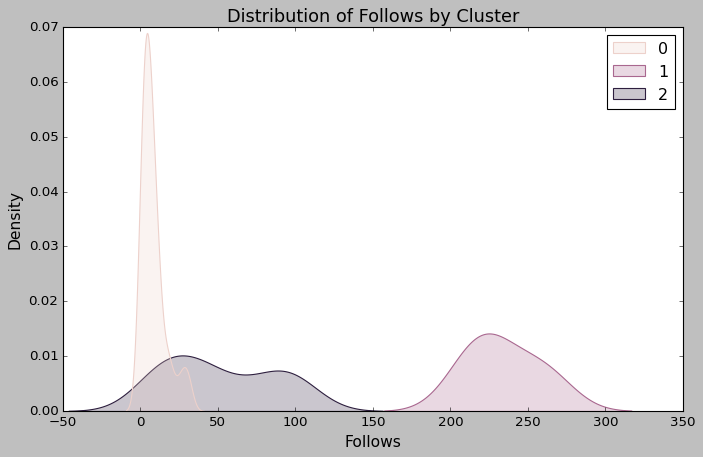

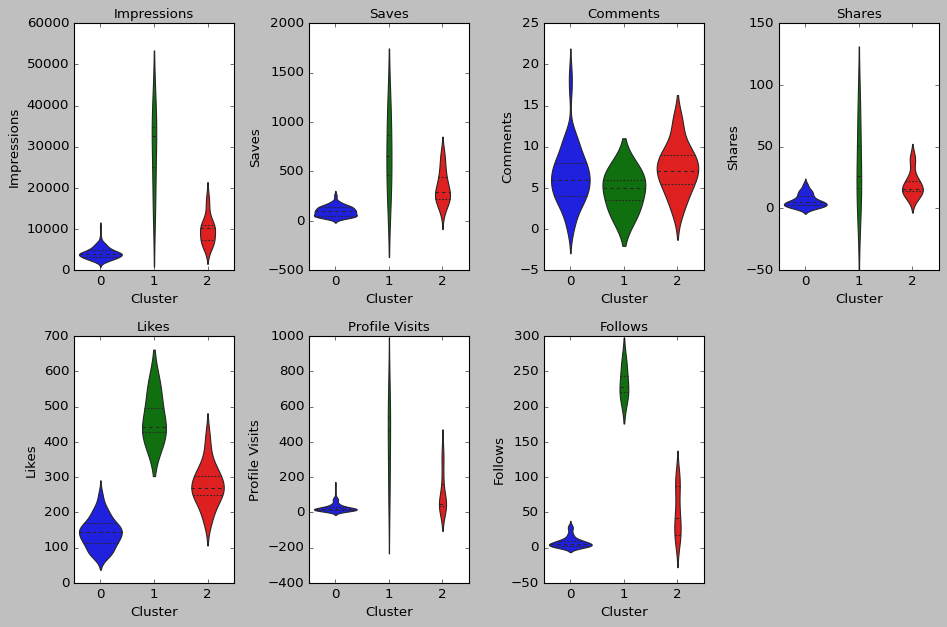

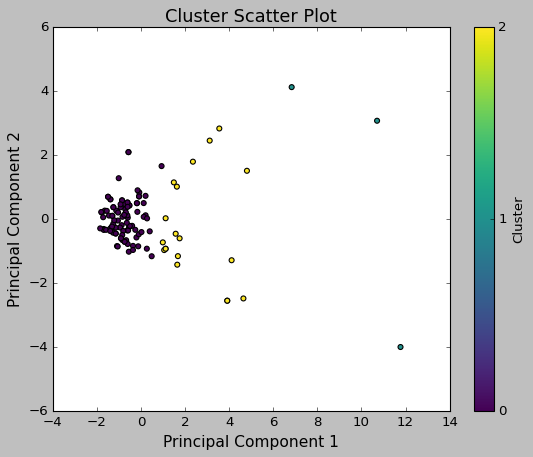

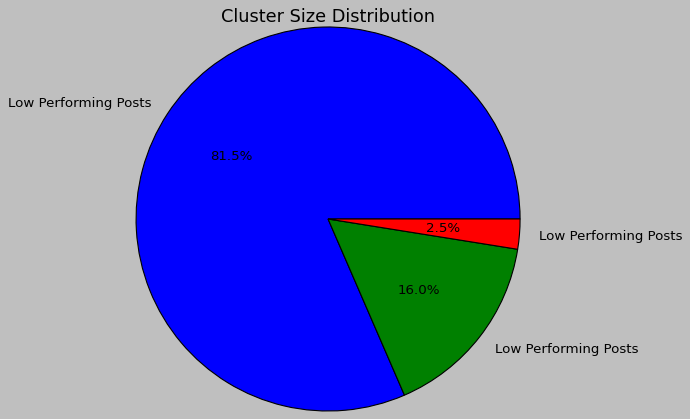

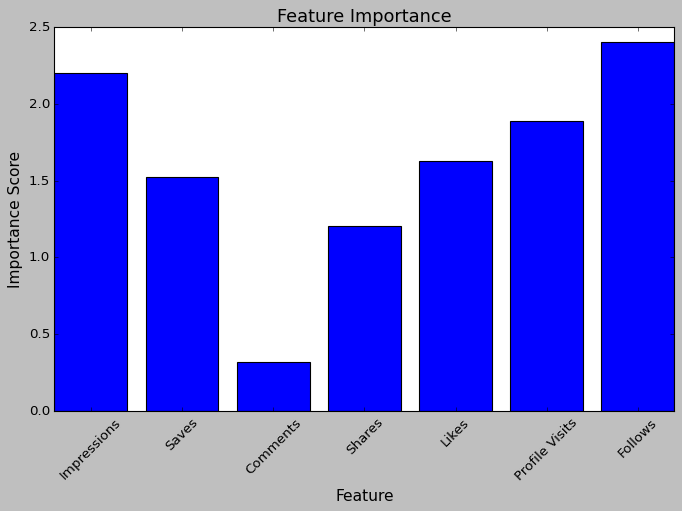

Cluster Profiles:
                        Impressions       Saves  Comments     Shares  \
Cluster                                                                
Low Performing Posts    4184.144330   99.453608  6.587629   6.463918   
High Performing Posts  29003.333333  677.666667  4.666667  36.000000   
High Performing Posts   9784.368421  345.473684  7.368421  19.947368   

                            Likes  Profile Visits     Follows  
Cluster                                                        
Low Performing Posts   144.278351       27.742268    8.103093  
High Performing Posts  469.333333      408.666667  234.000000  
High Performing Posts  277.736842      110.894737   51.684211  
The new data point belongs to: Low Performing Posts


c:\Users\pgupt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Sample data creation (replace this with your actual data loading)
# data = pd.read_csv('your_data.csv')
# Select relevant features
features = ["Impressions", "Saves", "Comments", "Shares", "Likes", "Profile Visits", "Follows"]
X = data[features]

# Handle missing values or outliers if needed

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Plot to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.show()

# Determine the number of clusters (k) based on the elbow plot
k = 3  # Example: 3 clusters

# Fit the K-Means algorithm
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_
labels = kmeans.labels_

# Cluster Feature Comparison
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x=feature, hue=labels, fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Cluster', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()


# Additional Visualizations

# Cluster Comparison Plot
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.violinplot(x='Cluster', y=feature, data=pd.concat([data, pd.DataFrame({'Cluster': labels})], axis=1), inner='quartile')
    plt.title(feature, fontsize=12)
plt.tight_layout()
plt.show()

# Cluster Scatter Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Scatter Plot', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.colorbar(ticks=range(k), label='Cluster')
plt.show()

# Cluster Size Pie Chart
cluster_sizes = pd.Series(labels).value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_sizes, labels=cluster_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Cluster Size Distribution', fontsize=16)
plt.show()

# Feature Importance Plot
feature_importance = np.std(cluster_centers, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Analyze cluster centers and assign descriptive cluster labels
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# Assign descriptive labels based on the characteristics of each cluster
cluster_labels = []
overall_mean = X.mean()
for i in range(k):
    center = cluster_centers[i]
    higher_count = sum(center > overall_mean)
    if higher_count >= len(features) * 2 / 3:
        cluster_labels.append('High Performing Posts')
    elif higher_count <= len(features) / 3:
        cluster_labels.append('Low Performing Posts')
    else:
        cluster_labels.append('Average Performing Posts')

# Function to classify new data with descriptive labels
def classify_new_data(impressions, saves, comments, shares, likes, profile_visits, follows):
    new_data = np.array([[impressions, saves, comments, shares, likes, profile_visits, follows]])
    new_data_scaled = scaler.transform(new_data)
    cluster_label = kmeans.predict(new_data_scaled)[0]
    cluster_name = cluster_labels[cluster_label]
    return cluster_name

# Cluster Profiling
cluster_profiles = pd.DataFrame(cluster_centers, columns=features)
cluster_profiles['Cluster'] = cluster_labels
cluster_profiles = cluster_profiles.set_index('Cluster')

print("Cluster Profiles:")
print(cluster_profiles)


# Example usage
new_impressions = 1500
new_saves = 15
new_comments = 44
new_shares = 5
new_likes = 70
new_profile_visits = 30
new_follows = 5
cluster_result = classify_new_data(new_impressions, new_saves, new_comments, new_shares, new_likes, new_profile_visits, new_follows)
print(f"The new data point belongs to: {cluster_result}") 